# D212 - Data Mining 2 Performance Assessment Task 1
Aidan Soares, 012042436, Western Governors University

### A1: Research Question
For this assessment I will be using the Churn dataset provided by WGU to answer the question "Can K-means clustering identify and establish meaningful customer groups and clusters, based on the continuous variables selected?". This question is being posed with the goal of further analysis of market segmentation between the data from customers currently observed within the WGU telecom company, setting the groundwork for insights into potential classification of customer demographics, and the analysis of customer retention based thereupon.

### A2: Goal
My goal for this performance assessment is to generate relevant and meaningful clusters of customers within the WGU Telecom Co. dataset. The expectation is that these groups will present opportunities for upper management, as well as the marketing department to identify specific patterns or demographics in the customers that in turn can be assessed for likelihood of satisfaction, churn, or targeted advertising. These insights can also provide the company numerous competitive advantages that could result in significant cost-saving measures in the long run.

### B1: Clustering Technique
K-Means clustering is an unsupervised machine learning algorithm that engages in pattern recognition and discovery to create clusters of data points from large sets of unsorted data. Unlike supervised learning, unsupervised learning develops and assigns classifications to data without an existing prediction task, there is no training data or targeted variable. As such, k-means is reliant on the distance measured from the center (centroid) of the cluster to 'group' these datapoints among likeness in multiple dimensions of our choosing. The expectation for this technique is to conduct an iterative process on the number of different datapoints, plotting them in a multidimensional space, which establishes that point as a centroid. The algorithm then congregates new datapoints together which creates the cluster, and recalculates the centroid of the cluster based on mean distances between datapoints within each cluster. The algorithm stops changing the centroid when no significant fluctuations in each cluster's centroid occurs with new datapoints (Sharma, 2024).

While there can realistically be an infinite amount of clusters identified by our algorithm, data entries with similar variability and patterns would tend to group together in distinct ways, it would be inappropriate if we were to select a small subset of clusters, forcing our algorithm to 'lasso' distant data that is not necessarily the same. Similarly, if we end of being too granular and selecting a large number of clusters then these groups would no longer represent an appropriate subset of customers. Ultimately, it is our responsibility to determine the most appropriate K value (the number of clusters) that can be counted within close distance of the centroid, for the most efficient segmentation of the potential clusters. 

### B2: Assumption of K-means Clustering
The major assumption of K-means clustering is that the clusters generated through the clustering algorithm are spherical in nature, with equal variance around the final centroid; resulting in a radius that's effectively equal in all directions from the centroid (Geeksforgeeks, 2023). For this analysis I have chosen to utilize a small number of continuous variables to limit the dimensionality of my k-means clustering to maintain clusters that do not break the relative spherical shape of this assumption.

### B3: Packages/Libraries
- Pandas: for constructing and manipulating dataframes
- Numpy and Scipy: for conducting mathematical operations on arrays
- Matplotlib and seaborn: for vizualizations of data
- Sklearn: for scaling the data, for reviewing metrics such as inertia and silhouette score, and for conducting my KMeans clustering.

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing, metrics
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

#importing dataset into a dataframe
df = pd.read_csv('churn_clean.csv', index_col=0)

### C1: Data Preprocessing Goal
The major objective for preprocessing is to scale the selected variables to the same ranges so that I can appropriately utilize them within my KMeans clustering model, if this is not performed then it would be difficult to cluster my datapoints within close proximity to eachother. Additionally, before scaling the data, all entries will be checked for any null and/or duplicate values that need to be omitted or imputed.

### C2: Dataset Variables
| Variable Name | Continuous/Categorical |
| :- | :- |
| Tenure | Continuous |
| Age | Continuous |
| Monthly Charge | Continuous |
| Bandwidth | Continuous |

### C3: Data Preparation Steps

In [2]:
#printing non-null counts and duplicates within the dataset, in any exist
df.info()
df.duplicated().value_counts()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 49 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Customer_id           10000 non-null  object 
 1   Interaction           10000 non-null  object 
 2   UID                   10000 non-null  object 
 3   City                  10000 non-null  object 
 4   State                 10000 non-null  object 
 5   County                10000 non-null  object 
 6   Zip                   10000 non-null  int64  
 7   Lat                   10000 non-null  float64
 8   Lng                   10000 non-null  float64
 9   Population            10000 non-null  int64  
 10  Area                  10000 non-null  object 
 11  TimeZone              10000 non-null  object 
 12  Job                   10000 non-null  object 
 13  Children              10000 non-null  int64  
 14  Age                   10000 non-null  int64  
 15  Income             

False    10000
dtype: int64

As no null values or duplicate entries exist, the dataset does not require any deletion or imputation. Next will be creating a new dataframe containing only the variables necessary for the clustering, and then scaling the data. Once the aforementioned transformations for the dataset are complete, the scaled dataset will be exported into a csv file for submission.

In [3]:
#creating a dataframe that contains only the variables selected above
newdf = df[["Tenure", "Age", "MonthlyCharge", "Bandwidth_GB_Year"]]
newdf.head()

,Tenure,Age,MonthlyCharge,Bandwidth_GB_Year
CaseOrder,,,,
1,6.795513,68,172.455519,904.536110
2,1.156681,27,242.632554,800.982766
3,15.754144,50,159.947583,2054.706961
4,17.087227,48,119.956840,2164.579412
5,1.670972,83,149.948316,271.493436


In [4]:
#scaling the data using z-score from the mean (Datacamp, n.d.)
scaler = preprocessing.StandardScaler()
scaled_df = scaler.fit_transform(newdf)
scaled_df = pd.DataFrame(scaled_df, columns = newdf.columns)
scaled_df.head()

,Tenure,Age,MonthlyCharge,Bandwidth_GB_Year
0,-1.048746,0.720925,-0.003943,-1.138487
1,-1.262001,-1.259957,1.630326,-1.185876
2,-0.709940,-0.148730,-0.295225,-0.612138
3,-0.659524,-0.245359,-1.226521,-0.561857
4,-1.242551,1.445638,-0.528086,-1.428184


### C4: Prepared Dataset
My cleaned and prepared dataset containing only the variables relevant for analysis can be found below, submitted alongside my jupyter notebook.

In [5]:
#exporting dataset to csv file
scaled_df.to_csv('kmeans_dataset.csv', index=False)

### D1: Determining Optimal Cluster Number
In determining the optimal cluster number available within the dataset, I will be utilizing the inertia of the clusters. The inertia is the distance between every datapoint and its cluster's centroid. Those values are squared and summed per cluster. In simpler terms, the inertia is sum of squares of distance measured in each cluster. There is an inverse relationship between the total number of clusters in a kmeans algorithm and the inertia of the clusters; the more clusters you have, the closer the measurements can be taken between the centroid and the surrounding datapoints, resulting in a lower inertia. This relationship is not linear, with significant decline in inertia beginnning with lower cluster numbers. As such, as the cluster number gets higher, there will be less drastic variability in the inertia as it approaches a limit.

To evaluate the 'optimal' number of clusters within our KMeans algorithm, we will be utilizing a technique known as the Elbow Method. The inertia values will be plotted to assess the sharpest decline in inertia, and once this decline starts to level off, the cluster number will be revealed through the 'elbow' of our plot. Furthermore, we can go further in determining the appropriate number of clusters and evaluate the quality of said clusters through the Silhouette Score method. The silhouette value is a measure of similarity between a datapoint and its own cluster, as compared to other clusters. These values range from -1 to 1, where a higher value demonstrates accurate matching between a datapoint and its cluster. As such, the highest silhouette score will denote the most appropriate cluster number (Gultekin, 2023). However, it may be difficult to achieve a high silhouette (above 0.5) due to the increased dimensionality of the 4 variables I have selected for my analysis.

Text(0.5, 1.0, 'Cluster Analysis')

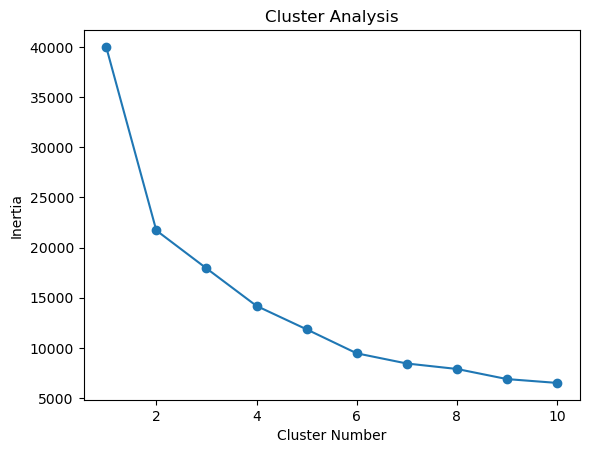

In [6]:
#creating the model for cluster numbers 1-10, using random state 10 to generate same centroids across multiple runs (Kamara, 2024)
inertia = []
for k in range (1, 11):
    imodel = KMeans(n_clusters = k, n_init = 'auto', random_state = 10)
    imodel.fit(scaled_df)
    inertia.append(imodel.inertia_)

#plotting inertia chart from model numbers determined above
plt.plot(range(1, 11), inertia, marker = 'o')
plt.xlabel("Cluster Number")
plt.ylabel("Inertia")
plt.title("Cluster Analysis")

As can be seen from the above plot, the inertia drastically drops at cluster number 2 and begins to gradually reduce with each incremental increase in cluster number, demonstrating that the appropriate cluster number is 2 for this analysis.

### D2: Clustering Analysis Code
The inertia-based clustering analaysis was performed above with code found in D1. Below is the code utilized to construct the clustering model based on a cluster number of 2.

In [7]:
#generating the final model for KMeans clustering with cluster number of 2
finalmodel = KMeans(n_clusters = 2, n_init = 'auto', random_state = 10)
finalmodel.fit(scaled_df)

KMeans(n_clusters=2, n_init='auto', random_state=10)

In [8]:
#reviewing the labels generated by our model
finalmodel.labels_

array([0, 0, 0, ..., 1, 1, 1])

In [9]:
#reviewing the centroids of the model
finalmodel.cluster_centers_

array([[-0.96010434, -0.01920356,  0.00216866, -0.9517153 ],
       [ 0.96087273,  0.01921893, -0.0021704 ,  0.95247697]])

Text(0.5, 1.0, 'Silhouette Score Analysis')

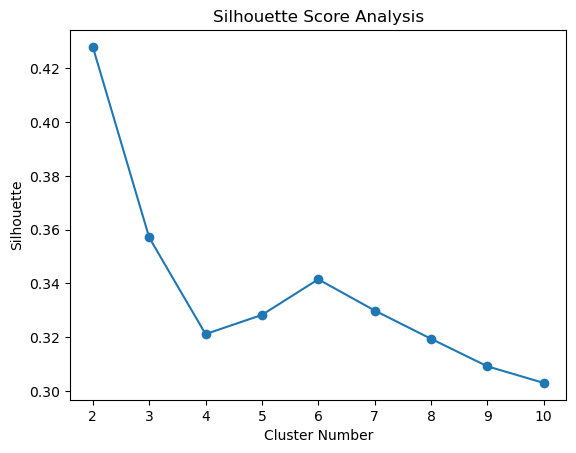

In [10]:
#assessing the silhouette score numbers per cluster numbers 2-11 (Kamara, 2024)
silhouette = []
for k in range (2, 11):
    smodel = KMeans(n_clusters = k, n_init = 'auto', random_state = 10)
    smodel.fit(scaled_df)
    silhouette.append(silhouette_score(scaled_df, smodel.labels_))

#plotting silhouette chart from model numbers determined above
plt.plot(range(2, 11), silhouette, marker = 'o')
plt.xlabel("Cluster Number")
plt.ylabel("Silhouette")
plt.title("Silhouette Score Analysis")

In [11]:
#creating and printing the silhouette scores of the model above
silhouettedf = pd.DataFrame({'Clusters': range(2,11), 'Silhouette Scores': silhouette})
print(silhouettedf.to_string(index=False))

 Clusters  Silhouette Scores
        2           0.427974
        3           0.357097
        4           0.321160
        5           0.328290
        6           0.341541
        7           0.329934
        8           0.319410
        9           0.309176
       10           0.302998


The above analysis corroborates that the appropriate number of clusters for our KMeans clustering model is 2.

### E1: Cluster Quality
KMeans clustering is an unsupervised machine learning technique, and cannot be evaluated by comparing to established patterns within a training dataset. However, to evaluate the accuracy and quality of my clustering model I utilized the Silhouette Score method. As stated above, the silhouette value is a measure of similarity between a datapoint and its own cluster, as compared to other clusters. These values range from -1 to 1, where a higher absolute value demonstrates accurate matching between a datapoint and its cluster, indicating that the datapoints belong to the correct clusters. From the analysis performed in section D2 a cluster number of 2 resulted in the highest silhouette score within the dataset of 0.43. This score demonstrates that the KMeans clustering algorithm is moderately able to appropriately categorize datapoints into the correct clusters with similar likeness. 

### E2: Results & Implications
After utilizing the elbow method and assessing the silhouette scores of all possible cluster numbers between 1 and 10, it was determined that the best cluster number to represent and classify the customers within the dataset based upon the continuous variables selected was 2 clusters. If this number were to increase then the inertia of the model would be lower, but the accuracy in assigning datapoints to appropriate clusters would falter as well. Therefore, 2 clusters is the ideal amount within our analysis.

In section D2, the algorith outputted the centroids for each feature in each of the 2 clusters for our model, that being **[-0.96010434, -0.01920356, 0.00216866, -0.9517153]**, and **[0.96087273, 0.01921893, -0.0021704, 0.95247697]**. Each array represents the centroids for each feature in our 4-dimensional space in order of Tenure, Age, Monthly Charge, and Bandwidth in GB per year. The data was standardized along the z-scores of the data, the measure of standard deviations away from the mean. Notably, only the features Tenure and Bandwidth show strong variability unlike the Age and Charge centroids that do not really stray from their respective means. As can be seen from the second array, this cluster of customers demonstrate a Tenure positively distributed approximately 1 standard deviation above the mean, implying that this cluster of customers are likely to remain longer with the company than those grouped within the first array's cluster. As such, it would be beneficial for the company to further pursue analysis and greater understanding of the customer demographics within cluster 2, as these are the customers that seem to be happy maintaining their contract with the WGU telecom company.

### E3: Limitation
The major limitation for this analysis is that KMeans clustering cannot incorporate the use of categorical variables in the clustering algorithm. This restricts and limits our ability to further develop more granular information regarding the customer demographics within each group, as tenure, age, charge, and bandwidth don't really tell us much on their own. Alternative user-submitted data such as survey results could yield useful insights for analysis such as this, but said data is categorical in nature.

### E4: Recommendation
My recommendation would be for upper management to further analyse the demographic structure of the customers within cluster 2, to assess if other distinct patterns can be recognized within that group. Doing so would result in a greater understanding of the types of customers that trend better towards longer tenures, so that marketing campaigns can be structured around attracting more customers that fit the demographic, or to encourage customers within cluster 1 to shift their current service plan structure into one that may strengthen retention and ultimately lead to stable revenue flow as well as cost savings for the company.

### F: Panopto
My panopto video can be found here: https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=5daf1dc2-3ab4-4e2a-9486-b17d00158e82

### G: Code Sources
Wilson, Benjamin. n.d. *Unsupervised Learning in Python*. Datacamp. https://app.datacamp.com/learn/courses/unsupervised-learning-in-python

Kamara, Kesselly. May 1, 2024. *Evaluating and Visualizing the Model*. Western Governors University. https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=9fa8783e-d7d2-4b4d-b06e-b0ee01874bea

### H: Sources
Sharma, Pulkit. May 21, 2024. *The Ultimate Guide to K-Means Clustering: Definition, Methods and Applications*. Analytics Vidhya. https://www.analyticsvidhya.com/blog/2019/08/comprehensive-guide-k-means-clustering/

Geeksforgeeks, December 9, 2023. *Demonstration of K-Means Assumptions*. Geeksforgeeks. https://www.geeksforgeeks.org/demonstration-of-k-means-assumptions/

Gultekin, Hazal. September 7, 2023. *What is Silhouette Score?*. Medium. https://medium.com/@hazallgultekin/what-is-silhouette-score-f428fb39bf9a